# EDA 과제 
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [235]:
df = pd.read_csv('airbnb_listings.csv', index_col=0)

C:\Users\dlatm\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (25,26,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [236]:
# Q1
df.head(5)

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,...,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,...,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,...,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,...,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,...,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [237]:
# Q2
temp=df.isnull().sum()[df.isnull().sum()!=0]

null_df=pd.DataFrame(data=temp, index=temp.index, columns=['missing_num'] )
null_df['missing_%']=(null_df['missing_num']/df.shape[0] *100).round(0)
null_df.sort_values(by=['missing_num'], axis=0, ascending=False, inplace=True)

null_df=null_df[:18]
null_df

,missing_num,missing_%
jurisdiction_names,50781,100.0
license,50759,100.0
square_feet,50407,99.0
monthly_price,46119,91.0
weekly_price,45411,89.0
host_response_rate,19006,37.0
host_response_time,19006,37.0
security_deposit,17325,34.0
host_acceptance_rate,14015,28.0
review_scores_value,11482,23.0


- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

<AxesSubplot:ylabel='missing_%'>

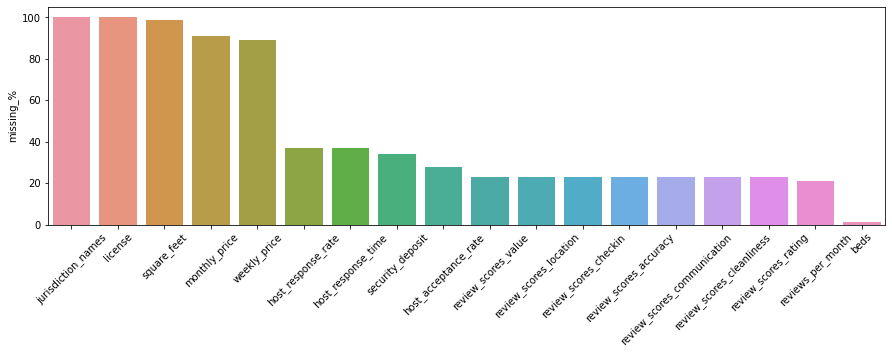

In [238]:
# Q3
plt.figure(figsize = (15,4))
plt.xticks(rotation=45)
sns.barplot(x=null_df.index, y='missing_%', data=null_df)


- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다. 
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [239]:
# Q4
df[df['beds'].isnull()].head(5)

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,...,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,...,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,...,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,...,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,...,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [224]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [225]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50796 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다. 
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

<AxesSubplot:xlabel='room_type', ylabel='count'>

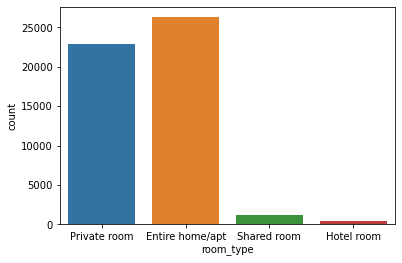

In [227]:
# Q5
sns.countplot(x='room_type', data=df)

- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

<AxesSubplot:ylabel='room_type'>

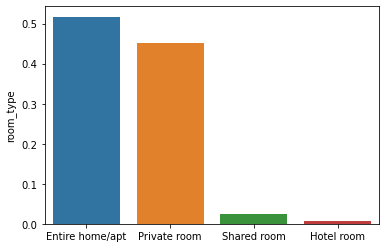

In [228]:
# Q6
temp_df=pd.DataFrame(data={'room_type':df['room_type'].value_counts() / df.shape[0]} )
sns.barplot(x=temp_df.index, y='room_type', data=temp_df)

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

<AxesSubplot:xlabel='neighborhood', ylabel='count'>

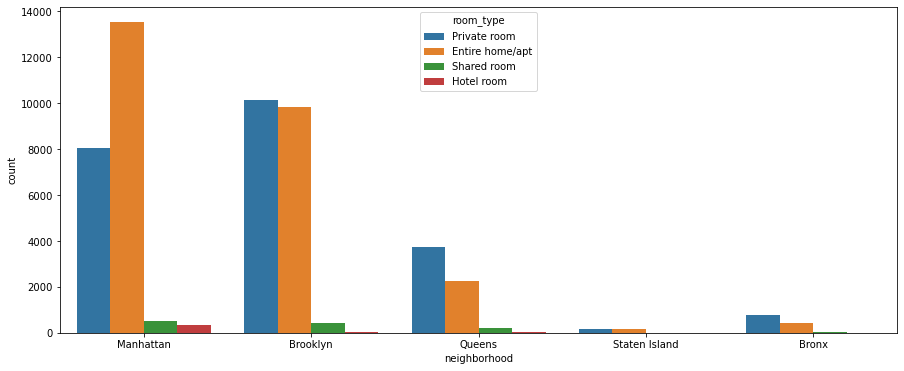

In [229]:
# Q7
plt.figure(figsize=(15,6))
sns.countplot(x='neighborhood', hue='room_type', data=df)

- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

<AxesSubplot:xlabel='neighborhood', ylabel='price'>

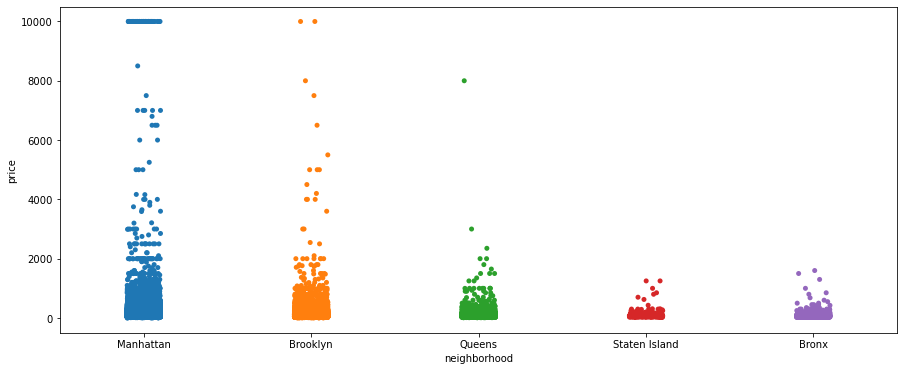

In [230]:
# Q8
# plt.figure() 여기부턴 직접 사이즈 조절해보세요
plt.figure(figsize=(15,6))
sns.stripplot(x='neighborhood', y='price', data=df)

- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

<AxesSubplot:xlabel='room_type', ylabel='price'>

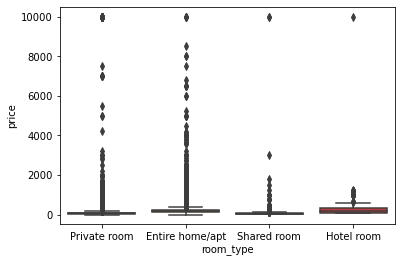

In [231]:
# Q9

# 1. 먼저 Q8 stripplot에서 Manhattan 지역에서 price가 10000인 데이터들이 많았던 것과
# Q7에서 Manhattan 지역에 빨간색(hotel room) 의 수가 좀 있는 것을 보고
# 2. 또한 Staten island나 Bronx는 호텔이 없으면서 price가 엄청 튀는 데이터도 없는 것을 보고, 

# 다른 지역에 비해 Manhattan에 호텔이 상대적으로 많구나.그리고 그 호텔들의 price가 높아서 
# stripplot에서 상위권에 찍혔구나 라고 생각했습니다. 그런데  

Manhattan_room=df[(df['neighborhood']=='Manhattan') ]
Manhattan_room[Manhattan_room['price']>=9999]['room_type'].value_counts()
# 위 코드를 실행시켜 보니 정작 맨하탄 지역에서 price가 9999 이상인 방의 room_type을 보니 Hotel room은 
# 한 개밖에 없었습니다. 초고가 집의 대부분은 정작 private room이 차지하고 있었습니다.
Manhattan_room[Manhattan_room['room_type']=='Private room']['price'].describe()
Manhattan_room[Manhattan_room['room_type']=='Entire home/apt']['price'].describe()
Manhattan_room[Manhattan_room['room_type']=='Shared room']['price'].describe()

# 그래서 또 위 코드로 알아보니 Private room이 2분위수에 비해 평균이 높고, 
# 표준편차가 다른 room type에 비해 두 배 이상 높음을 확인하였습니다.
sns.boxplot(x="room_type", y="price", data=df)
# boxplot으로도 확인해보니 작아서 정확히 확인되지는 않지만 
# private room과 entire hoom/apt은 IQR을 넘는 데이터가 엄청 많은 것을 확인했습니다.
# IQR 상한을 넘는 데이터가 많기 때문에 Q8 stripplot의 결과가 나온 것 같습니다.

---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

(array([3.1006e+04, 5.5040e+03, 7.7540e+03, 2.0500e+03, 2.5020e+03,
        4.8500e+02, 7.5200e+02, 1.0700e+02, 2.5400e+02, 4.6000e+01,
        1.0800e+02, 2.0000e+01, 3.2000e+01, 1.7000e+01, 1.5600e+02,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 1.  ,  2.05,  3.1 ,  4.15,  5.2 ,  6.25,  7.3 ,  8.35,  9.4 ,
        10.45, 11.5 , 12.55, 13.6 , 14.65, 15.7 , 16.75, 17.8 , 18.85,
        19.9 , 20.95, 22.  ]),
 <BarContainer object of 20 artists>)

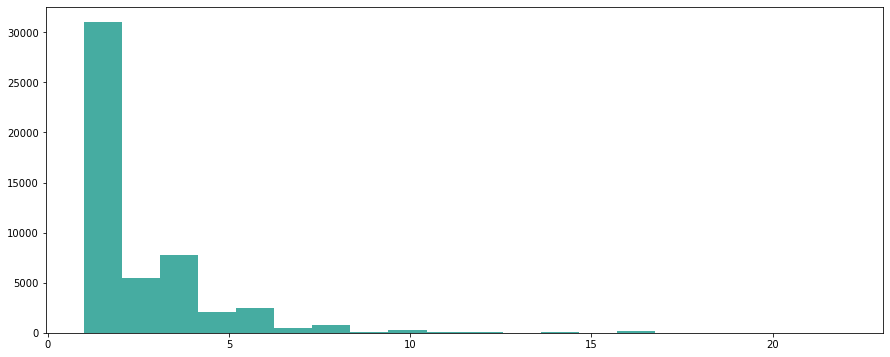

In [232]:
# Q10
plt.figure(figsize=(15,6))
plt.hist(x='accommodates', data=df, bins=20, color=(70/255, 172/255, 161/255))

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

0         100
1         225
2          89
3         200
4          94
         ... 
50791     150
50792     149
50793     188
50794    1100
50795     450
Name: price, Length: 50796, dtype: int64

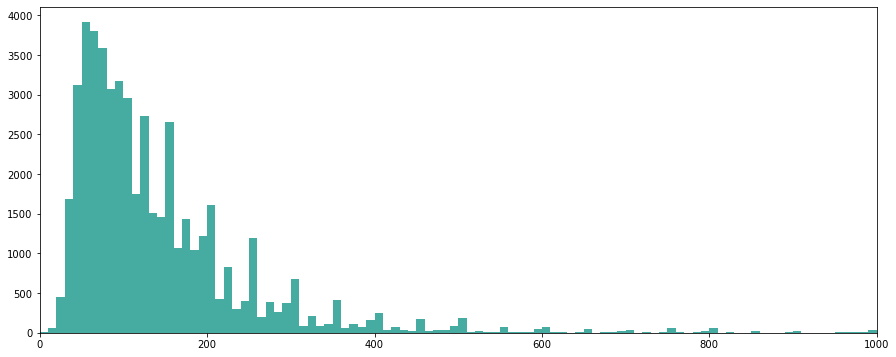

In [233]:
# Q11
plt.figure(figsize=(15,6))
plt.hist(x='price', data=df,bins=1000, color=(70/255, 172/255, 161/255))
plt.xlim(0, 1000)
df['price']

In [240]:
이번 과제 너무 성심성의껏 만드신게 느껴지고 난이도도 적당~어려움 이어서 시각화 공부 진짜 잘 된 것 같아요!! 
과제 끝내기 위해서 억지로라도 공부 하니까 이제 plt랑 sns 다루는데에 조금 익숙해 진 것 같아요 ㅎㅎ
강의 자료 열심히 준비하시고 만드신 수빈님, 과제 적당한 난이도로 내시는데 신경쓰고 강의내용 전체적으로 훑을 수 
있도록 짜주신 지환님 모두 감사드립니다!!

SyntaxError: invalid syntax (<ipython-input-240-588a0f0ba41b>, line 1)

---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

시각화한 자료를 바탕으로 실제 특성들을 가공하는 방법에 대해서는 

<font color='orange'> 다음 시간인 FE 시간에 배우게 될 예정입니다.

다음 시간에 봐요!

---

* Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요. </font>

* Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>

